In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/titanic.csv")

In [3]:
# Basic information about the DataFrame
df.info()
df.describe()
df.head(10)
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
# Basic feature engineering
df = df.drop(columns=["Cabin"])
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
dtype: int64

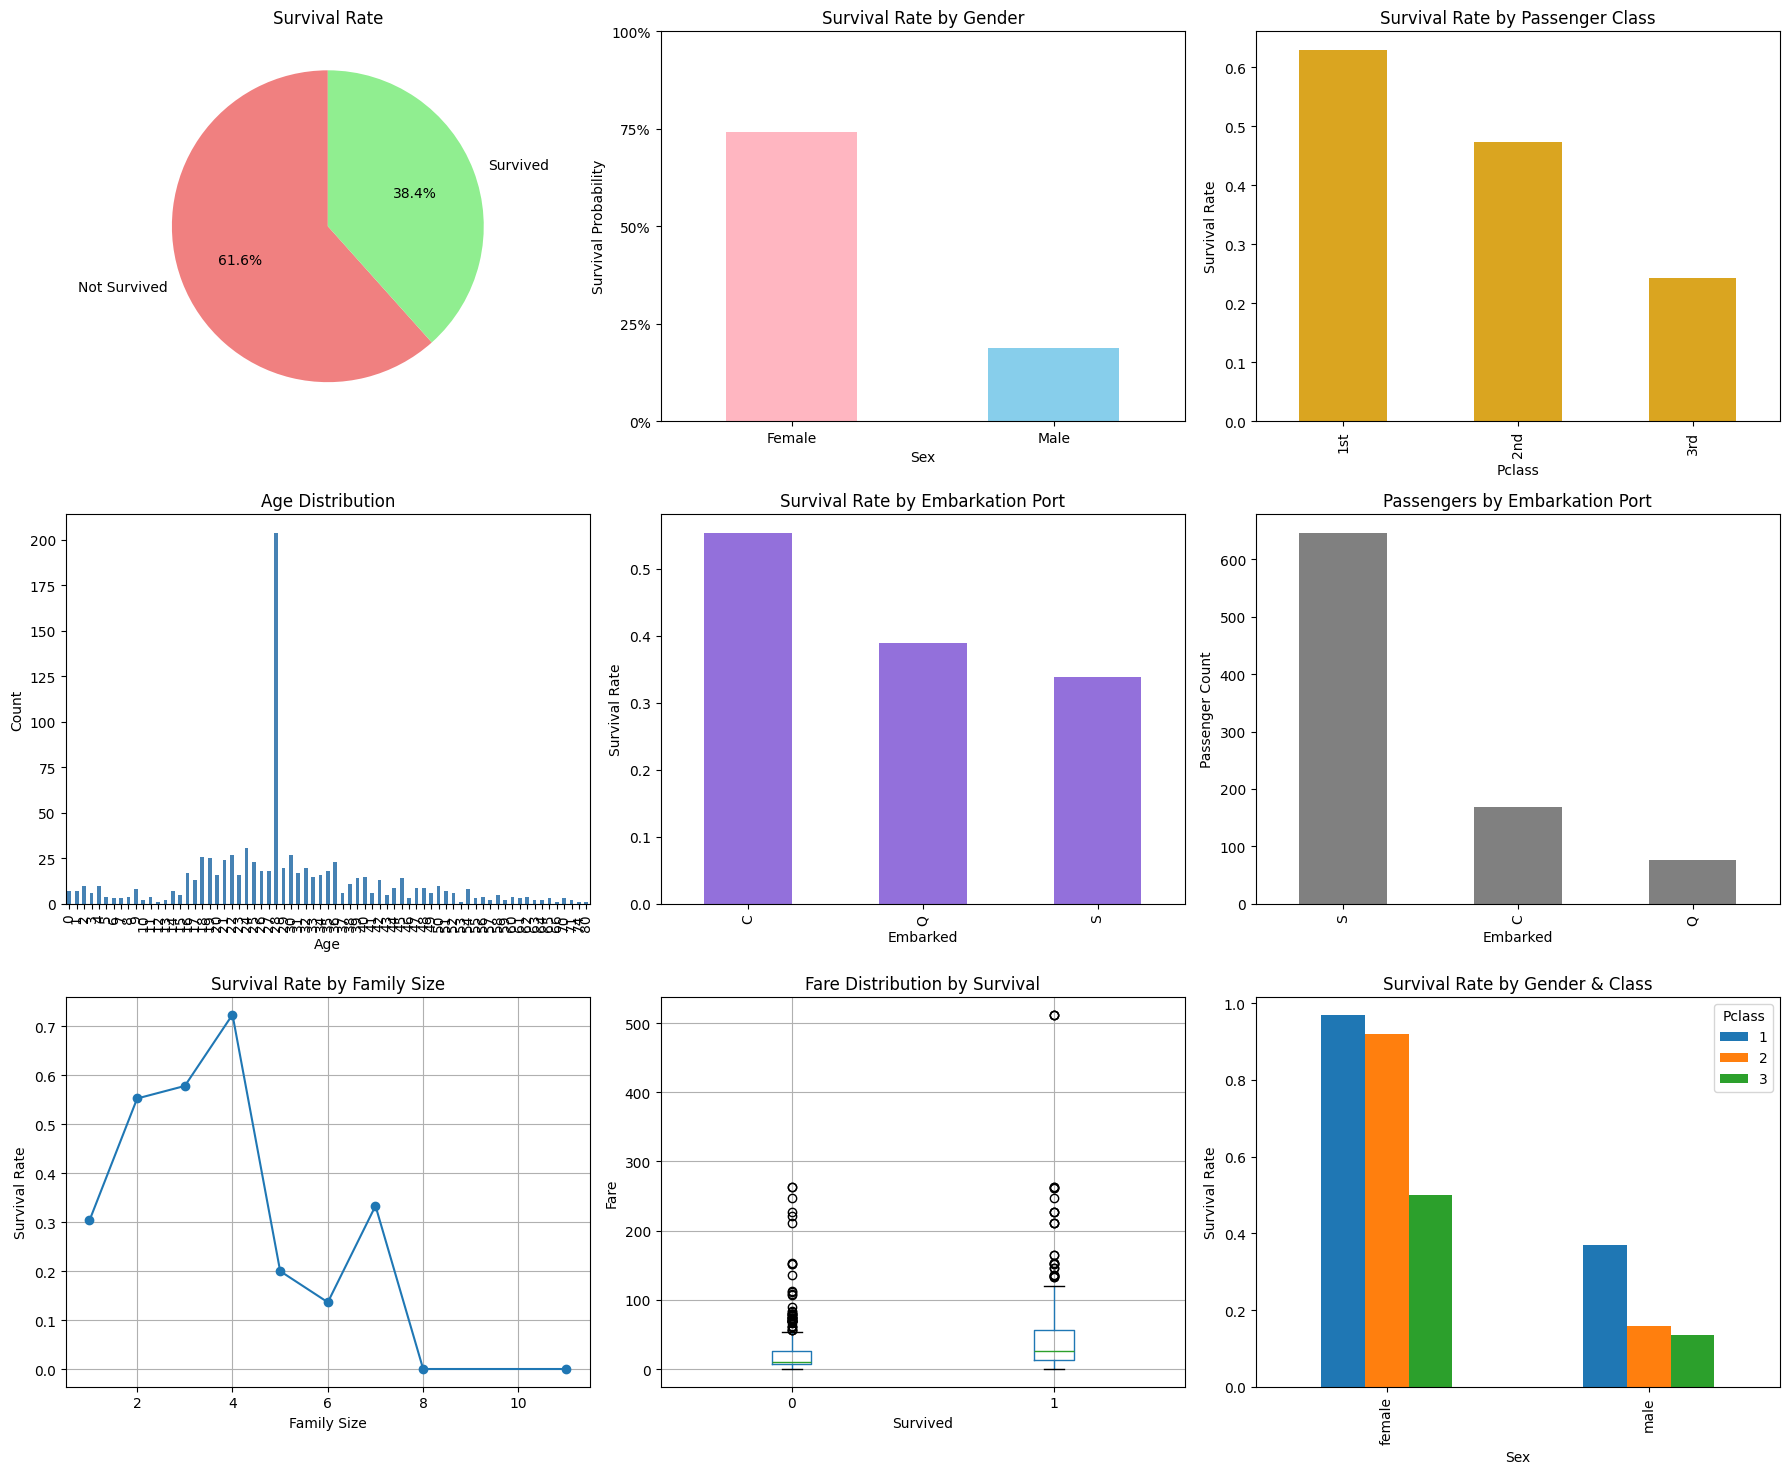

In [5]:
# Subplots setup
fig, axs = plt.subplots(3, 3, figsize=(18, 15))
axs = axs.flatten()

# 1. Survival Rate (Pie)
df["Survived"].value_counts().plot.pie(
    autopct="%1.1f%%", startangle=90,
    labels=["Not Survived", "Survived"],
    colors=["lightcoral", "lightgreen"], ax=axs[0]
)
axs[0].set_title("Survival Rate")
axs[0].set_ylabel("")

# 2. Survival by Gender
df.groupby("Sex")["Survived"].mean().plot.bar(
    color=["lightpink", "skyblue"], ax=axs[1]
)
axs[1].set_title("Survival Rate by Gender")
axs[1].set_ylabel("Survival Probability")
axs[1].set_yticks([0, 0.25, 0.5, 0.75, 1])
axs[1].set_yticklabels(["0%", "25%", "50%", "75%", "100%"])
axs[1].set_xticklabels(["Female", "Male"], rotation=0)

# 3. Survival by Pclass
df.groupby("Pclass")["Survived"].mean().plot.bar(
    color="goldenrod", ax=axs[2]
)
axs[2].set_title("Survival Rate by Passenger Class")
axs[2].set_ylabel("Survival Rate")
axs[2].set_xticks([0, 1, 2])
axs[2].set_xticklabels(["1st", "2nd", "3rd"])

# 4. Age Distribution
df["Age"].astype(int).value_counts().sort_index().plot.bar(
    color="steelblue", ax=axs[3]
)
axs[3].set_title("Age Distribution")
axs[3].set_xlabel("Age")
axs[3].set_ylabel("Count")

# 5. Survival by Embarkation
df.groupby('Embarked')['Survived'].mean().plot.bar(
    color='mediumpurple', ax=axs[4]
)
axs[4].set_title("Survival Rate by Embarkation Port")
axs[4].set_ylabel("Survival Rate")

# 6. Embarkation Count
df['Embarked'].value_counts().plot(kind='bar', color='gray', ax=axs[5])
axs[5].set_title("Passengers by Embarkation Port")
axs[5].set_ylabel("Passenger Count")

# 7. Family Size
df.groupby('FamilySize')['Survived'].mean().plot(marker='o', ax=axs[6])
axs[6].set_title("Survival Rate by Family Size")
axs[6].set_xlabel("Family Size")
axs[6].set_ylabel("Survival Rate")
axs[6].grid(True)

# 8. Fare vs Survival (Boxplot)
df.boxplot(column='Fare', by='Survived', ax=axs[7])
axs[7].set_title("Fare Distribution by Survival")
axs[7].set_xlabel("Survived")
axs[7].set_ylabel("Fare")
axs[7].figure.suptitle('')

# 9. Survival by Gender and Class
pd.crosstab(df['Sex'], df['Pclass'], values=df['Survived'], aggfunc='mean').plot(
    kind='bar', ax=axs[8]
)
axs[8].set_title("Survival Rate by Gender & Class")
axs[8].set_ylabel("Survival Rate")

plt.tight_layout()
plt.show()


Accuracy: 0.8435754189944135

Confusion Matrix:
 [[103  14]
 [ 14  48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       117
           1       0.77      0.77      0.77        62

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



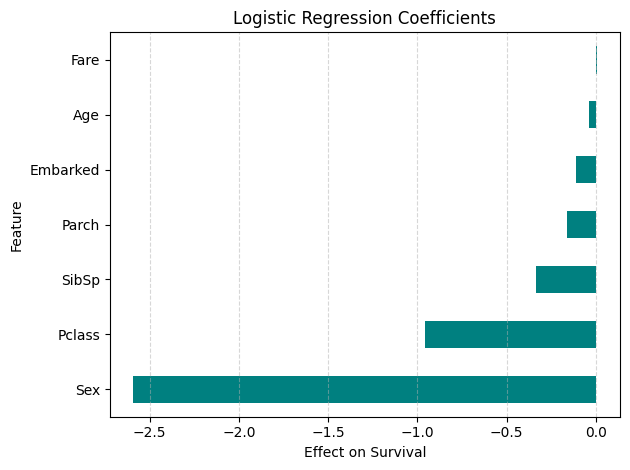

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Target
y = df["Survived"]

# Selected features (simple version to start)
X = df[["Pclass", "Sex", "Age", "Fare", "Embarked", "SibSp", "Parch"]]

# Encode 'Sex' and 'Embarked' as integers
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

X.loc[:, "Sex"] = le_sex.fit_transform(X["Sex"])
X.loc[:, "Embarked"] = le_embarked.fit_transform(X["Embarked"])


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=45
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient")

# Plot
coefficients.plot.barh(x="Feature", y="Coefficient", legend=False, color="teal")
plt.title("Logistic Regression Coefficients")
plt.xlabel("Effect on Survival")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


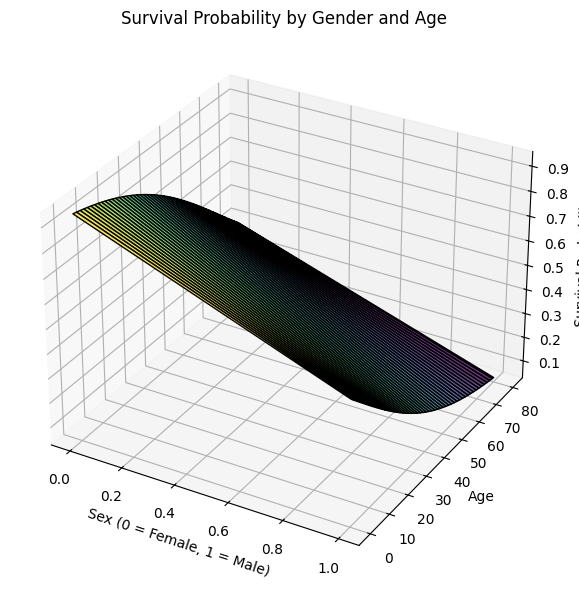

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Define range of values for Sex (0 = female, 1 = male) and Age
sex_values = np.array([0, 1])  # female, male
age_values = np.linspace(0, 80, 100)

# Create meshgrid
Sex, Age = np.meshgrid(sex_values, age_values)

# Flatten to feed into model
sex_flat = Sex.ravel()
age_flat = Age.ravel()

# 2. Create a DataFrame for prediction
# Use constant values for other features
X_grid = pd.DataFrame({
    "Pclass": 2,              # fix class to 2nd class
    "Sex": sex_flat,          # 0 or 1
    "Age": age_flat,          # 0 to 80
    "Fare": 30,               # average fare
    "Embarked": 2,            # most common: Southampton
    "SibSp": 0,
    "Parch": 0
})

# 3. Predict survival probability using trained model
Z = model.predict_proba(X_grid)[:, 1]  # probability of Survived == 1
Z = Z.reshape(Sex.shape)  # reshape for 3D surface

# 4. Plot the surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(Sex, Age, Z, cmap='viridis', edgecolor='k', alpha=0.8)

ax.set_xlabel("Sex (0 = Female, 1 = Male)")
ax.set_ylabel("Age")
ax.set_zlabel("Survival Probability")
ax.set_title("Survival Probability by Gender and Age")

plt.tight_layout()
plt.show()
